In [19]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

pickle_in = open("X_test_converti.pickle","rb")
X_test = pickle.load(pickle_in)
X_test = np.array(X_test)

pickle_in = open("y_test_converti.pickle","rb")
y_test = pickle.load(pickle_in)
y_test = np.array(y_test)

pickle_in = open("X_train_converti_1.pickle","rb")
X_train_1 = pickle.load(pickle_in)
X_train_1 = np.array(X_train_1)

pickle_in = open("y_train_converti_1.pickle","rb")
y_train_1 = pickle.load(pickle_in)
y_train_1 = np.array(y_train_1)

pickle_in = open("X_train_converti_2.pickle","rb")
X_train_2 = pickle.load(pickle_in)
X_train_2 = np.array(X_train_2)

pickle_in = open("y_train_converti_2.pickle","rb")
y_train_2 = pickle.load(pickle_in)
y_train_2 = np.array(y_train_2)

In [20]:
X_test = X_test[:,0, :, :,:]
X_train_1 = X_train_1[:,0, :, :,:]
X_train_2 = X_train_2[:,0, :, :,:]

In [18]:
y_train_2.shape

(789,)

In [21]:
X_train = np.concatenate((X_train_1, X_train_2), axis=0)
y_train = np.concatenate((y_train_1, y_train_2), axis=0)

In [23]:
y_train.shape

(1613,)

In [24]:
X_test.shape

(978, 224, 224, 3)

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2022-03-31 16:33:52.552053: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/tivi/.local/share/virtualenvs/projet-4-groupe-4-gsk5EPr-/lib/python3.8/site-packages/cv2/../../lib64:
2022-03-31 16:33:52.552177: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [26]:
model = tf.keras.applications.mobilenet.MobileNet()

2022-03-31 16:33:55.730175: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/tivi/.local/share/virtualenvs/projet-4-groupe-4-gsk5EPr-/lib/python3.8/site-packages/cv2/../../lib64:
2022-03-31 16:33:55.730201: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-31 16:33:55.730225: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tivi-ThinkPad-T460s): /proc/driver/nvidia/version does not exist
2022-03-31 16:33:55.730959: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appro

In [27]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [28]:
base_input = model.layers[0].input

In [29]:
base_output = model.layers[-4].output

In [30]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation("sigmoid")(final_output)

In [31]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [32]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [33]:
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
history = new_model.fit(X_train, y_train, epochs=3, validation_split=0.1)

2022-03-31 16:34:12.865788: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 873664512 exceeds 10% of free system memory.


Epoch 1/3
46/46 [==============================] - 159s 3s/step - loss: 0.1669 - accuracy: 0.9511 - val_loss: 6.1824 - val_accuracy: 0.4444
Epoch 2/3
46/46 [==============================] - 151s 3s/step - loss: 0.0454 - accuracy: 0.9835 - val_loss: 16.2118 - val_accuracy: 0.4012
Epoch 3/3
46/46 [==============================] - 150s 3s/step - loss: 0.0164 - accuracy: 0.9952 - val_loss: 0.2549 - val_accuracy: 0.9568


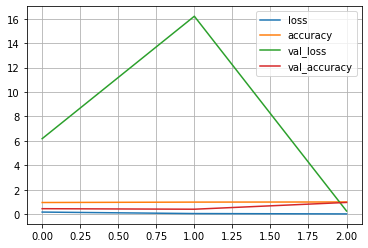

In [35]:
pd.DataFrame(history.history).plot()
plt.grid(True)

In [36]:
evaluation = new_model.evaluate(X_test, y_test)
print(evaluation)

31/31 [==============================] - 17s 545ms/step - loss: 0.4027 - accuracy: 0.9489
[0.4027428925037384, 0.9488752484321594]


In [37]:
y_pred_proba = new_model.predict(X_test[:500])

In [38]:
y_true = y_test[:500]

In [39]:
import seaborn as sns

In [40]:
y_pred_converti = []
for elm in y_pred_proba:
    if elm > 0.0000001:
        #NO mask
        valeur = 1
        y_pred_converti.append(valeur)
    else:
        #Mask
        valeur = 0
        y_pred_converti.append(valeur)

<AxesSubplot:>

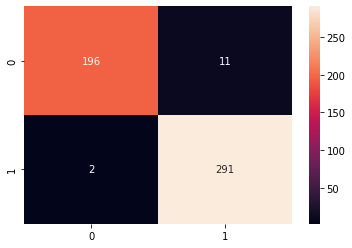

In [41]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test[:500], y_pred_converti)
sns.heatmap(matrix, annot=True, fmt="g")

In [42]:
from sklearn.metrics import classification_report
target_names = ["0", "1"]
print(classification_report(y_test[:500], y_pred_converti, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       207
           1       0.96      0.99      0.98       293

    accuracy                           0.97       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



In [43]:
df = pd.DataFrame()

In [44]:
df["y_true"] = y_true
df["y_pred"] = y_pred_proba
df["y_pred_converti"] = y_pred_converti

In [45]:
error = df[df["y_true"] != df["y_pred_converti"]]

In [46]:
error.index

Int64Index([8, 12, 66, 144, 184, 206, 251, 269, 298, 312, 383, 415, 474], dtype='int64')

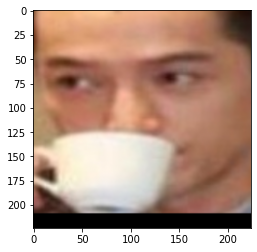

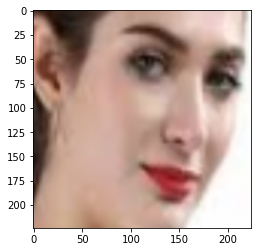

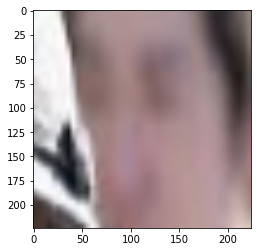

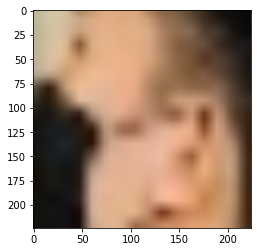

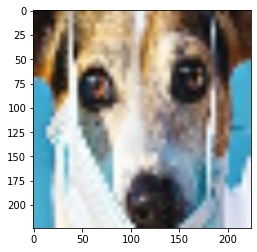

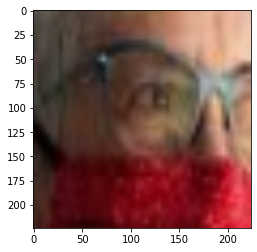

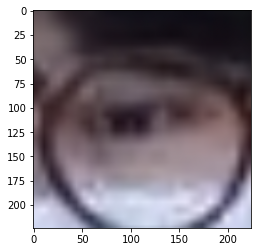

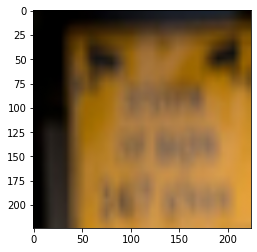

In [47]:
for elm in error.index:
    plt.imshow(X_test[elm,:,:,:])
    plt.show()

<AxesSubplot:ylabel='Count'>

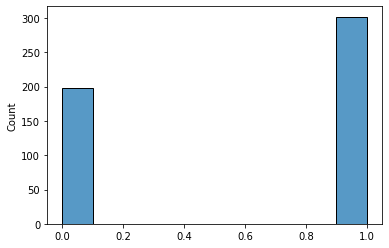

In [48]:
sns.histplot(y_pred_converti)

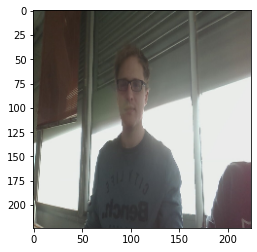

In [67]:
img_array = cv2.imread("armand.jpg")
img_size = 224

new_array = cv2.resize(img_array, (img_size, img_size))
final_image = np.expand_dims(new_array, axis=0)
final_image = final_image/255.0
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [68]:
final_image.shape

(1, 224, 224, 3)

In [69]:
prediction = new_model.predict(final_image)

In [70]:
prediction

array([[0.8076311]], dtype=float32)

In [49]:
new_model.save("model_transfer_crop.h5")